In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy.linalg as la

### Question 1

In this question we want to compute a measure of social welfare when individuals differ in their earnings
potential. Income (y) is log-normally distributed across households, with probability density function f(y)
and parameters µ and σ
2
. The size of the population is normalized to 1, so that expected values also
represent aggregate values.
Suppose that every consumer in the economy draws utility from their income. We assume that the utility
function, u(y), exhibits constant absolute risk aversion (γ):

(1.a) Plot the utility function when γ = −1, γ = 0.1, γ = 1 and γ = 2. 

In [236]:
def plot_f(gamma):

    x = np.linspace(0,5, 100)
    f, ax = plt.subplots(figsize = (6,6))
    y = (1-np.exp(-gamma*x))/gamma
    plt.grid()
    plt.title("Plot for γ = " + str(gamma))
    plt.plot(x, y)

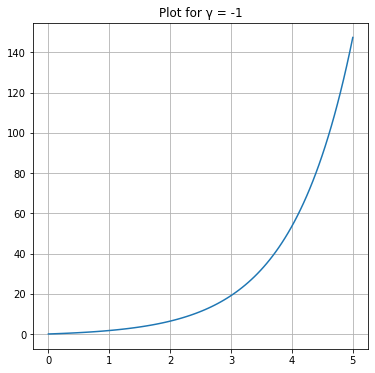

In [237]:
plot_f(-1)

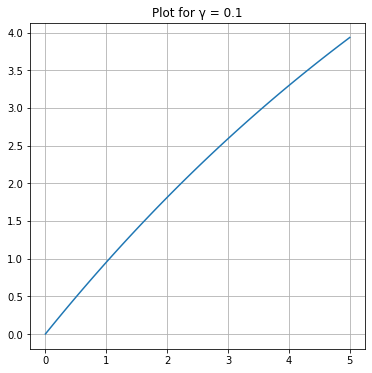

In [238]:
plot_f(0.1)

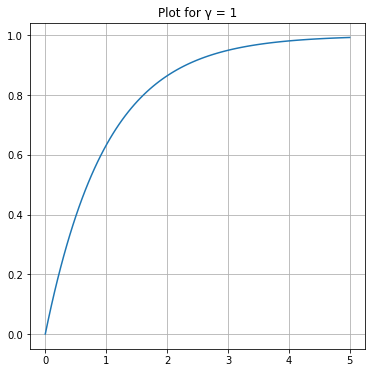

In [239]:
plot_f(1)

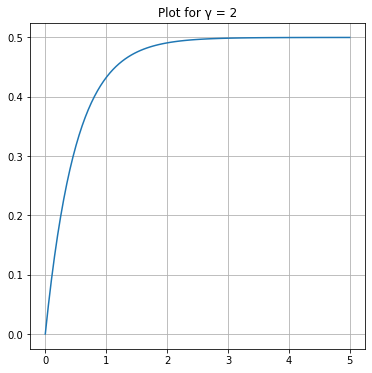

In [240]:
plot_f(2)

We can see that for instance where γ = -1 this refers to a risk-seeking person, a person who gets utility from engaging in risky behaviour which we see by the convex shape of the graph. For all the other instances, γ > 0, these represent risk averse people, with the γ the more risk averse they are, hence the cocave shape in the graphs. In the instance of γ = 0.1 it is very close to 0 which is a risk neutral person, which is why we almost get a linear graph.

(2.b) We consider a utilitarian social welfare function (SWF)

$$SWF = E[u(y)]$$

where E[u(.)] denotes the expectation operator, hence:

$$E[u(y)] = \int_0^i f(y) u(y)dy $$

Compute social welfare, with a numerical method of your choice, when the parameters have the following
values: γ = 1, µ = −0.1 and σ
2 = 0.2.

In [241]:
def _qnwnorm1(n):
    maxit = 100
    pim4 = 1 / np.pi**(0.25)
    m = np.fix((n + 1) / 2).astype(int)
    nodes = np.zeros(n)
    weights = np.zeros(n)

    for i in range(m):
        if i == 0:
            z = np.sqrt(2*n+1) - 1.85575 * ((2 * n + 1)**(-1 / 6.1))
        elif i == 1:
            z = z - 1.14 * (n ** 0.426) / z
        elif i == 2:
            z = 1.86 * z + 0.86 * nodes[0]
        elif i == 3:
            z = 1.91 * z + 0.91 * nodes[1]
        else:
            z = 2 * z + nodes[i-2]

        its = 0

        while its < maxit:
            its += 1
            p1 = pim4
            p2 = 0
            for j in range(1, n+1):
                p3 = p2
                p2 = p1
                p1 = z * math.sqrt(2.0/j) * p2 - math.sqrt((j - 1.0) / j) * p3

            pp = math.sqrt(2 * n) * p2
            z1 = z
            z = z1 - p1/pp
            if abs(z - z1) < 1e-14:
                break

        if its == maxit:
            raise ValueError("Failed to converge in _qnwnorm1")

        nodes[n - 1 - i] = z
        nodes[i] = -z
        weights[i] = 2 / (pp*pp)
        weights[n - 1 - i] = weights[i]

    weights /= math.sqrt(math.pi)
    nodes = nodes * math.sqrt(2.0)

    return nodes, weights

In [242]:
def qnwnorm(n, mu=None, sig2=None, usesqrtm=False):
    n = np.asarray(n)
    d = n.size

    if mu is None:
        mu = np.zeros(d)
    else:
        mu = np.asarray(mu)

    if sig2 is None:
        sig2 = np.eye(d)
    else:
        sig2 = np.asarray(sig2).reshape(d, d)

    if all([x.size == 1 for x in [n, mu, sig2]]):
        nodes, weights = _qnwnorm1(n)
    else:
        nodes = []
        weights = []

        for i in range(d):
            _1d = _qnwnorm1(n[i])
            nodes.append(_1d[0])
            weights.append(_1d[1])

        nodes = gridmake(*nodes)
        weights = ckron(*weights[::-1])

    if usesqrtm:
        new_sig2 = la.sqrtm(sig2)
    else:  # cholesky
        new_sig2 = la.cholesky(sig2)

    if d > 1:
        nodes = nodes.dot(new_sig2) + mu  # Broadcast ok
    else:  # nodes.dot(sig) will not be aligned in scalar case.
        nodes = nodes * new_sig2 + mu

    return nodes.squeeze(), weights

In [243]:
def qnwlogn(n, mu=None, sig2=None):
    nodes, weights = qnwnorm(n, mu, sig2)
    return np.exp(nodes), weights

#### For γ = 1, µ = −0.1 and σ^2 = 0.2.

In [244]:
n = 100

mu = -0.1
var = 0.2

# γ(gamma)) = 1 
gamma = 1
ybar = 1

y, w = qnwlogn(n,mu,var)

#Let's compute the expected income, given the parameter values
expectedy = w@y
print("The expected income is:", expectedy)

#Let's compute the expected utility, given the parameter values
expectedutility = w@(1-np.exp(-gamma*y))/gamma
print("The expected utility is:", expectedutility)

#Let's compute the utility of a given certain income
ucert = (1-np.exp(-gamma*ybar))/gamma
print("The utility of the certain income is:", ucert)


The expected income is: 0.9999999999999956
The expected utility is: 0.5971824070508421
The utility of the certain income is: 0.6321205588285577


This generates the approximation $Eu(\tilde y) = 0.5971$ which is less than $u(\bar y) = 0.6321$. Therefore this person would accect the certain income, this is because this individual is risk averse and are willing to give away income to not face uncertanity

#### (1.c) Compute social welfare with the following parameter values.

Case 1:
 
$$\gamma = 1,  \mu = -0.1,   \sigma^{2} = 0.4$$

Case 2:
 
$$\gamma = 1,  \mu = 0.1,   \sigma^{2} = 0.2$$

Case 3:
 
$$\gamma = 2,  \mu = -0.1,   \sigma^{2} = 0.2$$

Case 1 $\gamma = 1,  \mu = -0.1,   \sigma^{2} = 0.4$



In [245]:
n = 100

mu = -0.1
var = 0.4

gamma = 1
ybar = 1

y, w = qnwlogn(n,mu,var)

#Let's compute the expected income, given the parameter values
expectedy = w@y
print("The expected income is:", expectedy)

#Let's compute the expected utility, given the parameter values
expectedutility = w@(1-np.exp(-gamma*y))/gamma
print("The expected utility is:", expectedutility)

#Let's compute the utility of a given certain income
ucert = (1-np.exp(-gamma*ybar))/gamma
print("The utility of the certain income is:", ucert)

The expected income is: 1.1051709180756426
The expected utility is: 0.5968832560628012
The utility of the certain income is: 0.6321205588285577


In [246]:
results = pd.DataFrame(columns=["Case","Gamma", "Mu", "Var", "Exp Utility", "Util of Certain Income"])

In [247]:
results = results.append({"Case":1, "Gamma":gamma, "Mu":mu, "Var":var, "Exp Utility":expectedutility,
                "Util of Certain Income":ucert}, ignore_index=True)

Case 2: $\gamma = 1,  \mu = 0.1,   \sigma^{2} = 0.2$

In [248]:
n = 100

mu = 0.1
var = 0.2

gamma = 1
ybar = 1

y, w = qnwlogn(n,mu,var)

#Let's compute the expected income, given the parameter values
expectedy = w@y
print("The expected income is:", expectedy)

#Let's compute the expected utility, given the parameter values
expectedutility = w@(1-np.exp(-gamma*y))/gamma
print("The expected utility is:", expectedutility)

#Let's compute the utility of a given certain income
ucert = (1-np.exp(-gamma*ybar))/gamma
print("The utility of the certain income is:", ucert)

The expected income is: 1.2214027581601643
The expected utility is: 0.6640842862004797
The utility of the certain income is: 0.6321205588285577


In [249]:
results = results.append({"Case":2, "Gamma":gamma, "Mu":mu, "Var":var, "Exp Utility":expectedutility,
                "Util of Certain Income":ucert}, ignore_index=True)

Case 3: $\gamma = 2,  \mu = -0.1,   \sigma^{2} = 0.2$

In [250]:
n = 100

mu = -0.1
var = 0.2

gamma = 2
ybar = 1

y, w = qnwlogn(n,mu,var)

#Let's compute the expected income, given the parameter values
expectedy = w@y
print("The expected income is:", expectedy)

#Let's compute the expected utility, given the parameter values
expectedutility = w@(1-np.exp(-gamma*y))/gamma
print("The expected utility is:", expectedutility)

#Let's compute the utility of a given certain income
ucert = (1-np.exp(-gamma*ybar))/gamma
print("The utility of the certain income is:", ucert)

The expected income is: 0.9999999999999956
The expected utility is: 0.40753311546234083
The utility of the certain income is: 0.43233235838169365


In [251]:
results = results.append({"Case":3, "Gamma":gamma, "Mu":mu, "Var":var, "Exp Utility":expectedutility,
                "Util of Certain Income":ucert}, ignore_index=True)

In [252]:
results

,Case,Gamma,Mu,Var,Exp Utility,Util of Certain Income
0,1.0,1.0,-0.1,0.4,0.596883,0.632121
1,2.0,1.0,0.1,0.2,0.664084,0.632121
2,3.0,2.0,-0.1,0.2,0.407533,0.432332


For case 1 we have γ = 1, which means people are risk averse and are most likley going to prefer having a certain income, which is exactly what we see above with $u(\bar y) = 0.63$ > $Eu(\tilde y) = 0.59$. In the second scenario we have something similar, however now because uncertain is distributed with a mean that is positive we get the opposite, and in this case $u(\bar y) = 0.63$ < $Eu(\tilde y) = 0.66$ and the individual would choose to not have a certain income. It should be noted that we actually get the same answer for utility of certain income as in case 1, however expected utility increased. In case 3, the risk averse parameter is increased which means we can expect this person to be more risk averse and less willing to not have a certain income. The other change from case 1 is that we half the variance of the normal distribution to 0.2. However, in this case as well we see that $u(\bar y) = 0.43$ > $Eu(\tilde y) = 0.40$, concluding that again a certain income is preffered

### Question 2: Simulation of Time Series Models 

(a) We first consider a variable (xt) that follows an Auto-Regressive process of order 1, that is an AR(1)
time series model with normally distributed i.i.d. shocks (εx,t):

$$x_{t} = \mu_{t} + p_{t}x_{t-1} + ε_{x,t} ~ N(0,\sigma^{2})$$

To start with, set the parameters at their benchmark values: µx = 2, ρx = 0, σ2
εx = 1.
Write a code in Python that simulates the series for 200 periods and computes the following sample statistics
(setting the seed to 1, and discarding the first 100 periods): the average and the variance. Compare the
sample results with their theoretical counterparts (the formulas are $E[xt] = \frac{µx}{1 − ρx}$ and $Var[x_{t}] = \frac{\sigma^{2}_{εx}}{1-p_{x}^{2}}$

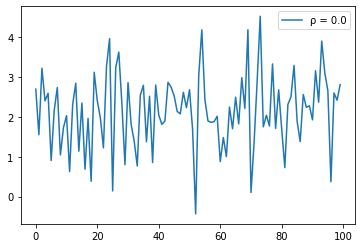

In [2]:
#Generate a non-iid sample (this is useful to simulate artificial time series)
np.random.seed(1)
mu_x = 2
sd_x = 1

#We consider a AR(1) model, with autocorrelation parameter ρ
rho = 0.0
ts_length = 200

x_values = []
current_x = 0

for i in range(ts_length):
    x_values.append(current_x)
    current_x = mu_x + rho * current_x + sd_x*np.random.randn()

# to simulate the burning of the first 100 samples
x_values = x_values[100:]

plt.plot(x_values, label=f'ρ = {rho}')    
plt.legend()
plt.show()

Now using the formula for the average
$$E[x_{t}] = \frac{µx}{1 − ρx}$$

where µx = 2 and ρx = 0 we ge that

$$E[x_{t}] = 2 $$

For variance we have 
$$Var[x_{t}] = \frac{\sigma^{2}_{εx}}{1-p_{x}^{2}}$$

where $\sigma^{2}=1$ and $p_{x} = 0$ we get that

$$Var[x_{t}] = 1 $$

Now we can compare that to the sample average we get from the simulation above

In [3]:
# Computing the sample average from the simulation

sampleavg = np.sum(x_values)/100
print("Sample Average:", sampleavg)

x_values = np.array(x_values)

samplevar=np.sum(x_values*x_values)/100
samplevar=samplevar-sampleavg*sampleavg
print("Sample Variance:", samplevar)

Sample Average: 2.149330677013848
Sample Variance: 0.8636248270475058


When comparing the sample average and sample variance to the actual variance and average computed above, we can see that they are slightly off. However with a sample size this small this is expected. Also regarding the time series because our autocorrelation parameter is zero we see no trend in the time series and a fluctuation around the mean

(b) Repeat the same exercise considered in part a, but now use these parameter values: µx = 1, ρx =
0.5, σ2 = 2.
Write a code in Python that simulates the series for 200 periods and computes the following sample statistics
(setting the seed to 1, and discarding the first 100 periods): the average and the variance. Compare the
sample results with their theoretical counterparts. Report your results and comment on your findings. Plot
the time series in a graph.

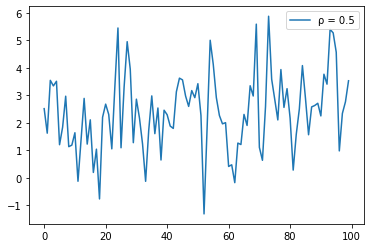

In [64]:
#Generate a non-iid sample (this is useful to simulate artificial time series)
np.random.seed(1)
mu_x = 1
sd_x = np.sqrt(2)

# We consider a AR(1) model, with autocorrelation parameter ρ
rho = 0.5
ts_length = 200

x_values = []
current_x = 0

for i in range(ts_length):
    x_values.append(current_x)
    current_x = mu_x + rho * current_x + sd_x*np.random.randn()

# to simulate the burning of the first 100 samples
x_values = x_values[100:]

plt.plot(x_values, label=f'ρ = {rho}')    
plt.legend()
plt.show()

Now using the formula for the average
$$E[x_{t}] = \frac{µx}{1 − ρx}$$

where µx = 1 and ρx = 0.5 and σ2 =2 we ge that

$$E[x_{t}] = 2 $$

For variance we have 
$$Var[x_{t}] = \frac{\sigma^{2}_{εx}}{1-p_{x}^{2}}$$

where $\sigma^{2}=1$ and $p_{x} = 0$ we get that

$$Var[x_{t}] = 2.67 $$

Now we can compare that to the sample average we get from the simulation above

In [67]:
# Computing the sample average from the simulation

sampleavg = np.sum(x_values)/100
print("Sample Average:", sampleavg)

x_values = np.array(x_values)

samplevar=np.sum(x_values*x_values)/100
samplevar=samplevar-sampleavg*sampleavg
print("Sample Variance:", samplevar)

Sample Average: 2.3976643470589503
Sample Variance: 1.9110779330865402


Again because we are only taking 200 samples we get some discrepencies in the values of our sample average and sample variance compared to the actual values. This time though because we have an autocorrelation factor (p) = 0.5 we do see a bit of an uptrend towards the end of the samples. A larger sample size would display the uptrend better. Also because we increased the variance in this sample, the time series is a bit more dispersed than in part a).

(c) Repeat the same exercise considered in part a, but now re-do it several times (Note: you may want
to use a do-loop to achieve this). In particular, we still simulate the series for 200 periods (discarding the
first 100 periods). But now we perform 500 “replications”, namely we repeat the simulation 500 times, every
time with a different seed. Set the seed according to seed=seed+iter, where iter stands for the iteration
number and the initial seed is seed=1. For each replication, compute the sample average and the sample
variance. Plot two histograms, one for each statistic resulting from the 500 replications. Comment.

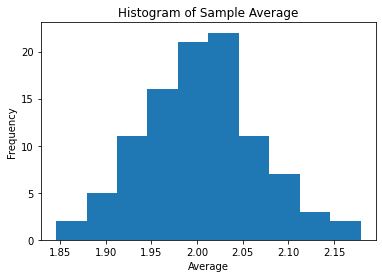

In [10]:
samp_avgs_500 = []
samp_vars_500 = []
seed = 1
iter = 0;
while (iter<500):
    np.random.seed(seed)
    mu_x = 2
    sd_x = 1

    #We consider a AR(1) model, with autocorrelation parameter ρ
    rho = 0.0
    ts_length = 200

    x_values = []
    current_x = 0

    for i in range(ts_length):
        x_values.append(current_x)
        current_x = mu_x + rho * current_x + sd_x*np.random.randn()
    
    iter+=1;
    seed+= iter; 
    sampleavg = np.sum(x_values)/200
    #print("Sample Average:", sampleavg)

    x_arr = np.array(x_values)

    samplevar= np.sum(x_arr*x_arr)/200
    samplevar=samplevar-sampleavg*sampleavg
    
    samp_avgs_500.append(sampleavg)
    samp_vars_500.append(samplevar)
    #print("Sample Variance:", samplevar)
    
# to simulate the burning of the first 100 samples
samp_avgs_500 = samp_avgs_500[:100]
samp_vars_500 = samp_vars_500[:100]

plt.title("Histogram of Sample Average")
plt.xlabel("Average")
plt.ylabel("Frequency")
plt.hist(samp_avgs_500)
plt.show()

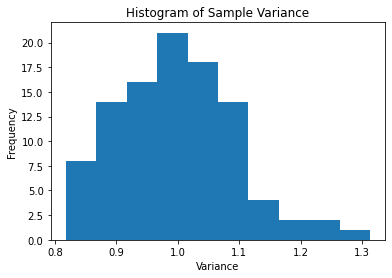

In [11]:
plt.title("Histogram of Sample Variance")
plt.ylabel("Frequency")
plt.xlabel("Variance")
plt.hist(samp_vars_500)
plt.show()

Now that we have 500 samples we can look at the histogram of the sample variances and averages. The histograms basically show us how we can get discpencies between the sample average/variance and the true value, as in both cases there is a range of values that the sample average/variance takes on. However in both instances they are centered on the true value, which corresponds to central limit theorm.

d) Repeat the same exercise considered in part a, but now focus on only one (but very long) simulation.
In particular, simulate the series for 10, 100 periods. Compute the following sample statistics (discarding the
first 100 periods): the average and the variance. Report your results and comment on your findings. Plot
the time series in a graph.

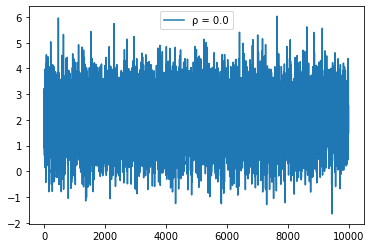

In [12]:
#Generate a non-iid sample (this is useful to simulate artificial time series)
np.random.seed(1)

mu_x = 2
sd_x = 1

#We consider a AR(1) model, with autocorrelation parameter ρ
rho = 0.0
ts_length = 10100 

x_values = []
current_x = 0

for i in range(ts_length):
    x_values.append(current_x)
    current_x = mu_x + rho * current_x + sd_x*np.random.randn()

# to simulate the burning of the first 100 samples
x_values = x_values[100:]

plt.plot(x_values, label=f'ρ = {rho}')    
plt.legend()
plt.show()

In [13]:
# Computing the sample average from the simulation

sampleavg = np.sum(x_values)/10000
print("Sample Average:", sampleavg)

x_values = np.array(x_values)

samplevar=np.sum(x_values*x_values)/10000
samplevar=samplevar-sampleavg*sampleavg
print("Sample Variance:", samplevar)

Sample Average: 2.008806507183555
Sample Variance: 0.9969197257833065


Now we have a large enough sample that our results are a lot more accurate than before. As I mentioned in part a) and b) the small size of our sample was leading to discrepencies between the sample variance/average and the true values. Now that we have this sample size of 10000 we can see that the sample results are basically exact with the true values

(e) Now we consider a non-negative variable (yt), whose log transformation follows an AR(1) stochastic
process with normally distributed i.i.d. shocks (εy,t):

$$\ln{y_{t}} = \mu_{t} + p_{t}\ln{y_{t-1}} + ε_{x,t} ~ N(0,\sigma^{2})$$

To start with, set the parameters at their benchmark values: $µ_{y} = 0, ρ_{y} = 0.75, σ2_{εy} = 2.$
Write a code in Python that simulates the series for 1, 100 periods and computes the following sample
statistics (discarding the first 100 periods): the average and the variance. Report your results and comment
on your findings. Plot the time series for yt (not ln yt) in a graph.

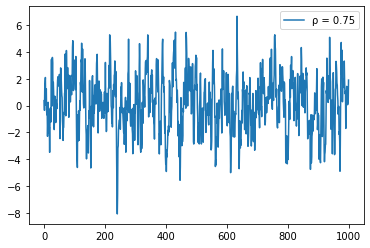

In [75]:
#Generate a non-iid sample (this is useful to simulate artificial time series)
np.random.seed(1)
mu_y = 0
sd_y = np.sqrt(2)

#We consider a AR(1) model, with autocorrelation parameter ρ
rho = 0.75
ts_length = 1100

y_values = []
current_y = 0

for i in range(ts_length):
    y_values.append(current_y)
    current_y = mu_y + rho * current_y + sd_y*np.random.randn()
    
# to simulate the burning of the first 100 samples
y_values = y_values[100:]

plt.plot(y_values, label=f'ρ = {rho}')    
plt.legend()
plt.show()

In [76]:
sampleavg = np.sum(y_values)/1000
print("Sample Average:", sampleavg)

y_values = np.array(y_values)

samplevar=np.sum(y_values*y_values)/1000
samplevar=samplevar-sampleavg*sampleavg
print("Sample Variance:", samplevar)

Sample Average: 0.19912122868984913
Sample Variance: 4.324158281254909


Because this equation is still normally distributed the same formulas for variance and
expectation apply

$$E[x_{t}] = \frac{µx}{1 − ρx}$$

now µx = 0 and ρx = 0.75 so we get that

$$E[x_{t}] = 0 $$

For variance we have 
$$Var[x_{t}] = \frac{\sigma^{2}_{εx}}{1-p_{x}^{2}}$$

where $\sigma^{2}= 2$ and $p_{x} = 0.75$ we get that

$$Var[x_{t}] = 4.57 $$

Now we can compare that to the sample average we get from the simulation above

If we compare the actual values to sample variance and average we can see that it is relativley close but still not exact. 

In [77]:
!jupyter-nbconvert --to PDFviaHTML Assignment_5.pdf

[NbConvertApp] WARNING | pattern 'Assignment_5.pdf' matched no files
This application is used to convert notebook files (*.ipynb) to various other
formats.


Options
-------

Arguments that take values are actually convenience aliases to full
Configurables, whose aliases are listed on the help line. For more information
on full configurables, see '--help-all'.

--debug
    set log level to logging.DEBUG (maximize logging output)
--generate-config
    generate default config file
-y
    Answer yes to any questions instead of prompting.
--execute
    Execute the notebook prior to export.
--allow-errors
    Continue notebook execution even if one of the cells throws an error and include the error message in the cell output (the default behaviour is to abort conversion). This flag is only relevant if '--execute' was specified, too.
--stdin
    read a single notebook file from stdin. Write the resulting notebook with default basename 'notebook.*'
--stdout
    Write notebook output to stdout